# Prediction of cab booking

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')

# Importing and exploring the datasets.

In [2]:
# Reading the train dataset & train_label and merging the train_label with train dataset

df=pd.read_csv('train.csv')
df1=pd.read_csv('train_label.csv',header=None,names=['Total_booking'])
df['Total_booking']=df1['Total_booking']

In [3]:
# Reading the test dataset

df_test=pd.read_csv('test.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [5]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [6]:
# checking the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [7]:
#unique values in object data types

print(df['season'].unique())
print(df['weather'].unique())

['Summer' 'Fall' 'Spring' 'Winter']
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']


# Missing or null value analysis

In [8]:
# Finding any missing values present in the dataset : No null values in the dataset

df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [9]:
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [10]:
# converting 'datetime' datatype from string to datetime for extracting hours,month,weekday information

df['datetime']=pd.to_datetime(df['datetime'])

In [11]:
df_test['datetime']=pd.to_datetime(df_test['datetime'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 680.4+ KB


In [13]:
# making individual columns for hours,month,weekday from datetime column

In [14]:
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.day_name()

In [15]:
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour
df_test['weekday']=df_test['datetime'].dt.day_name()

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,month,hour,weekday
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,19,Wednesday
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,4,Wednesday
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,9,Thursday
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,16,Friday
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,13,Tuesday


In [ ]:
#droping datetime column from the train and test dataset

In [17]:
# Drop the 'datetime' column
df = df.drop('datetime', axis=1)

# Print the updated dataset
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,13,Tuesday


In [18]:
# Drop the 'datetime' column
df_test = df_test.drop('datetime', axis=1)

# Print the updated dataset
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,weekday
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,5,11,Thursday
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,6,7,Saturday
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,3,20,Sunday
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,10,11,Thursday
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,6,12,Saturday


# Visualizing data using different visualizations 

In [ ]:
# plotting diffrrent types of plots for 0btaining different inferences

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'atemp'}>]], dtype=object)

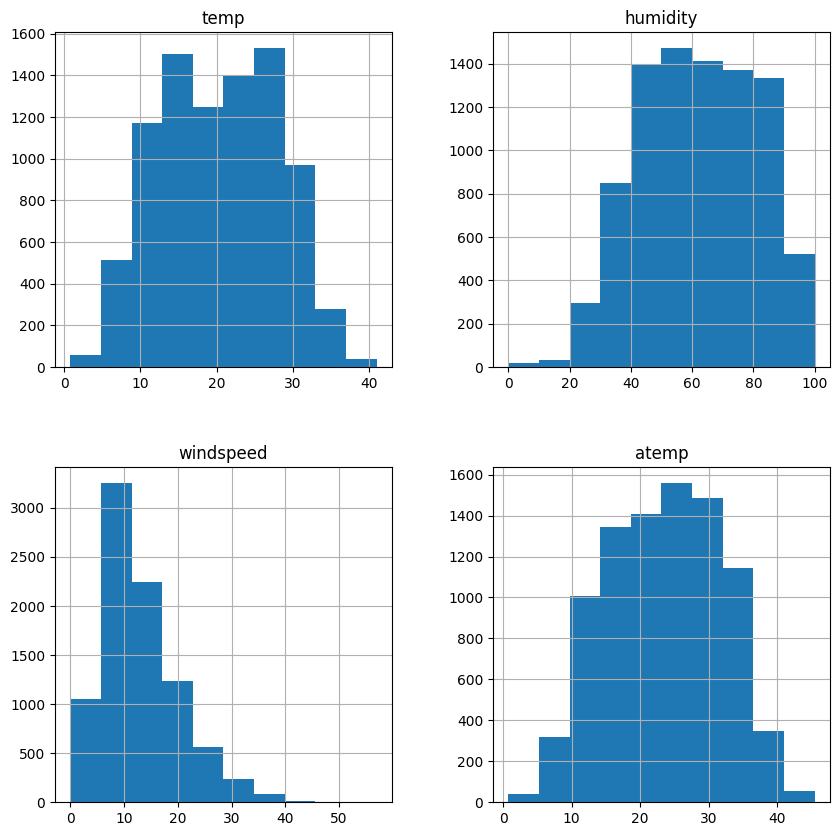

In [19]:
df[['temp','humidity','windspeed','atemp']].hist(figsize=(10,10))

In [ ]:
Here is the histogram of features which is showing us two things:
'windspeed' is right skewed (i.e it has outliers) which we can also confirm using its boxplot
whereas 'temp','humidity',atemp', there is no skewness in data

<Axes: xlabel='season', ylabel='Total_booking'>

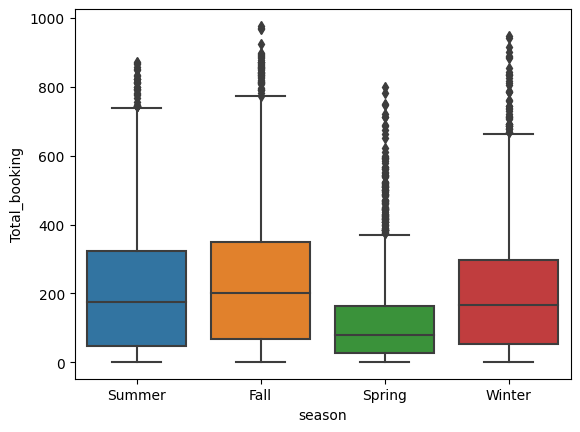

In [20]:
sns.boxplot(x ='season', y ='Total_booking', data = df)

In [ ]:
In all the all seasons (summer, fall, winter) except spring, no. of bookings are around 200(approx.)

<Axes: xlabel='season', ylabel='hour'>

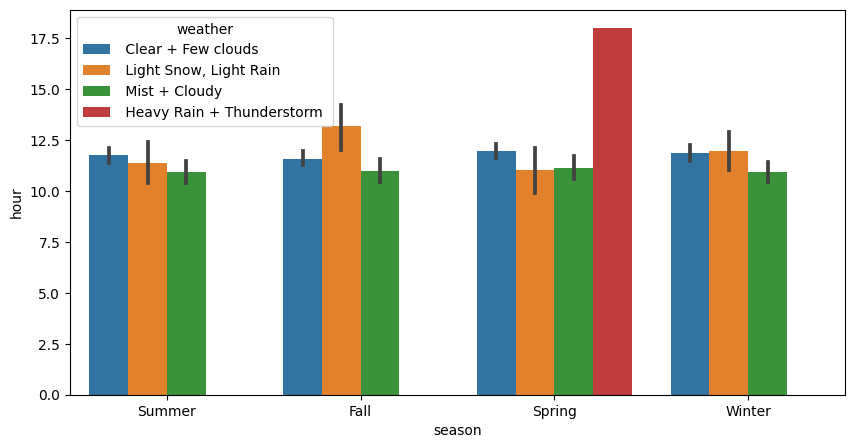

In [21]:
# plot btw weather & total_booking under different seasons
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='hour',data=df,hue='weather')

In [ ]:
This plot shows that under each season, which weather condition having how many max.no. of hours 

# Outlier analysis

<Axes: >

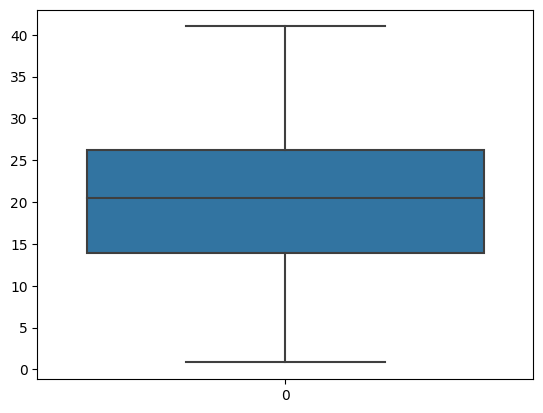

In [22]:
sns.boxplot(df['temp'])

<Axes: >

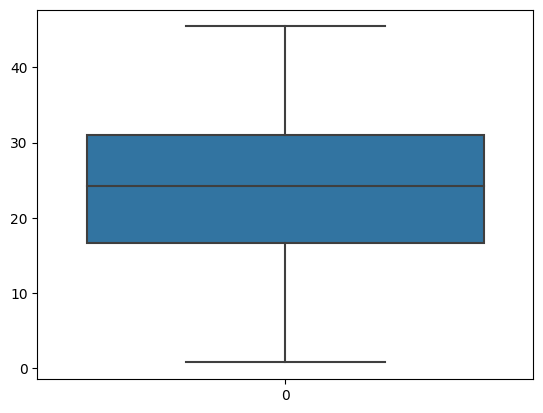

In [23]:
sns.boxplot(df['atemp'])

<Axes: >

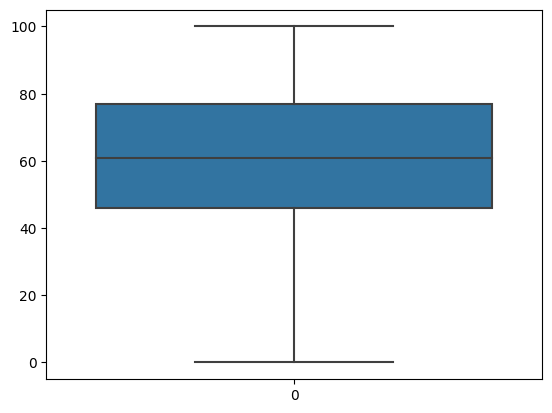

In [24]:
sns.boxplot(df['humidity'])

<Axes: >

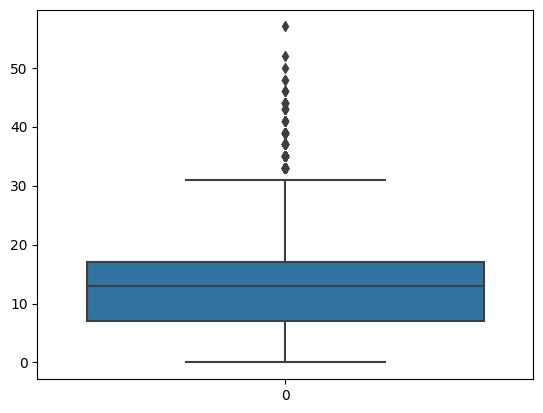

In [25]:
sns.boxplot(df['windspeed'])

In [ ]:
Here we can see that columns containing temp, atemp, humidity has no outliers, But the windspeed contaions outliers.

In [26]:
# removing of outliers of windspeed using IQR
q1=df['windspeed'].quantile(0.25)
q2=df['windspeed'].quantile(0.75)
iqr=q2-q1
whisker1=q1-1.5*iqr
whisker2=q2+1.5*iqr
df=df[(df['windspeed']>whisker1) & (df['windspeed']<whisker2)]

<Axes: >

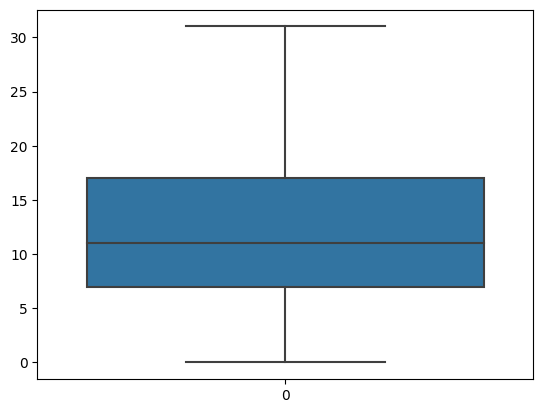

In [27]:
sns.boxplot(df['windspeed'])

In [ ]:
 No outlier in windspeed after outlier analysis

# Correlation Analysis

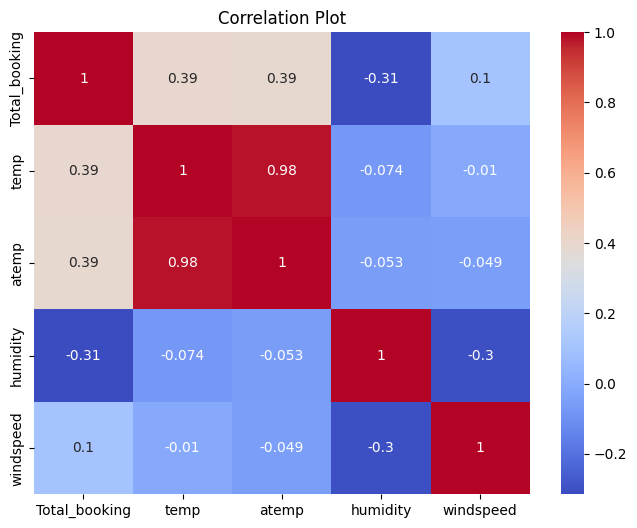

In [28]:
# Select the columns for correlation plot
columns = ["Total_booking", "temp", "atemp", "humidity", "windspeed"]

# Create a correlation matrix
correlation_matrix = df[columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [ ]:
Here we can see that the atemp & temp having strong correlation between them, so we can say that one feature is sufficient in building the model
Also the temp/atemp has ositiive correlation & humidity has Negative correlation with total bookings
Whereas the windspeed has less correlation on total bookings but some dependency is there so, we can retain it.


<Axes: >

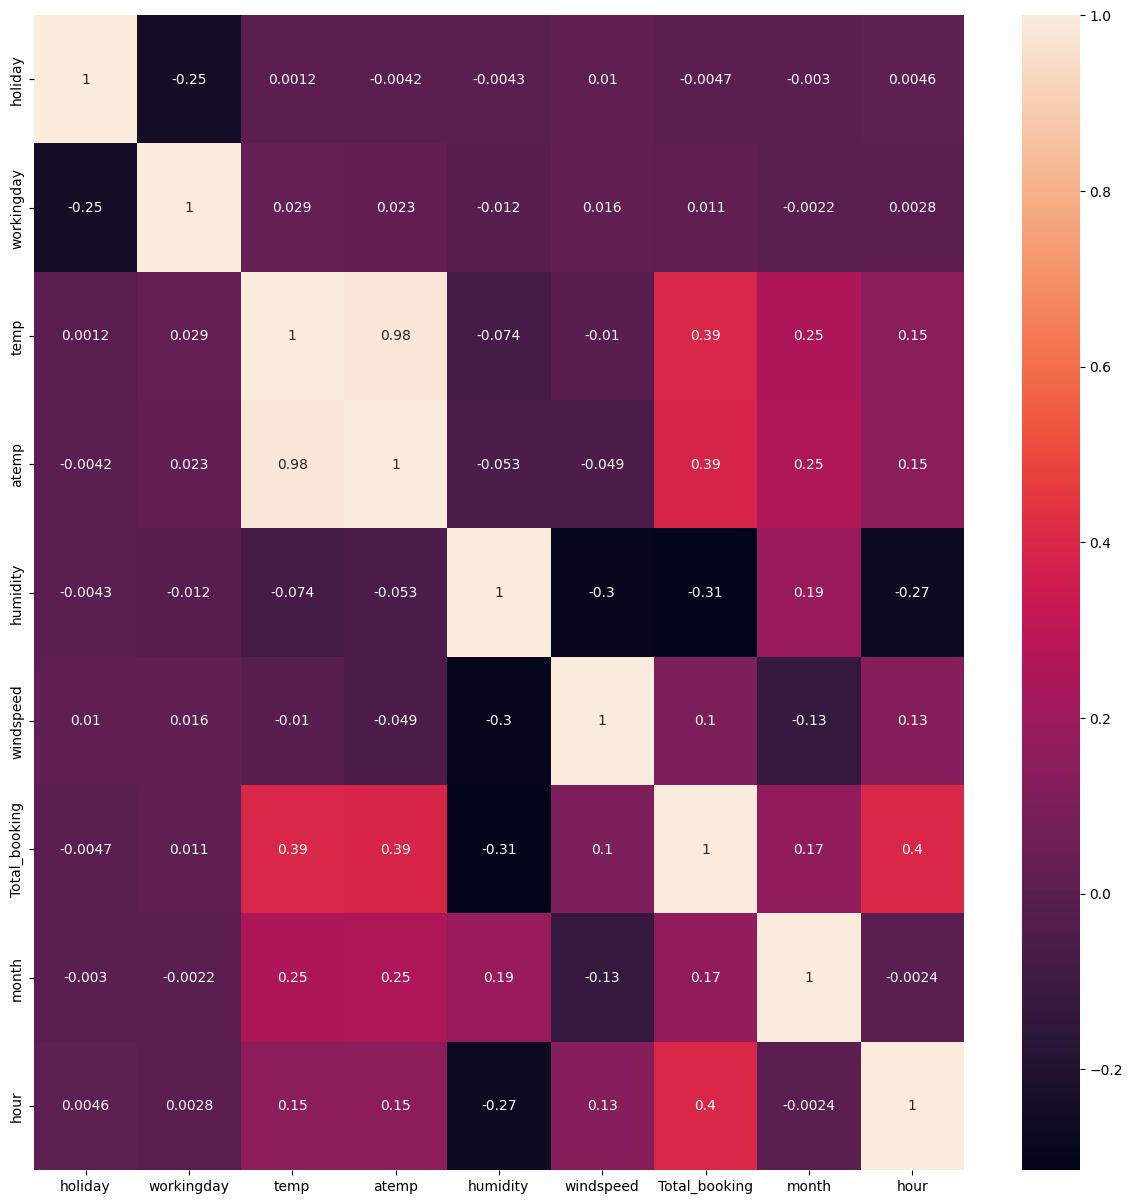

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# Visualizing Total_booking Vs other features to generate insights

In [ ]:
# On 'Fall' cab bookings are more compared to other seasons
# On 'Spring' cab bookings are less compared to other seasons

<Axes: xlabel='season', ylabel='Total_booking'>

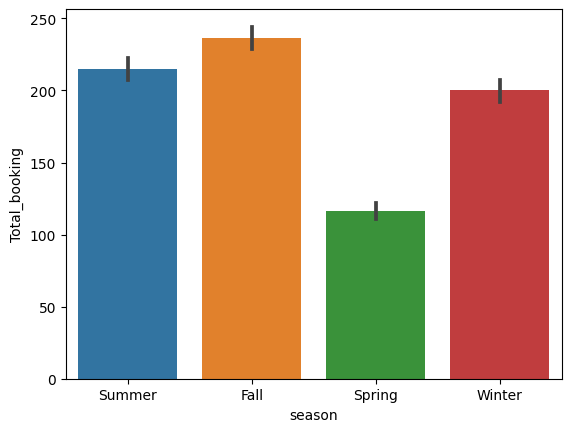

In [30]:
sns.barplot(x='season',y='Total_booking',data=df)

In [ ]:
cab bookings are same wheather it is a holiday or not

<Axes: xlabel='holiday', ylabel='Total_booking'>

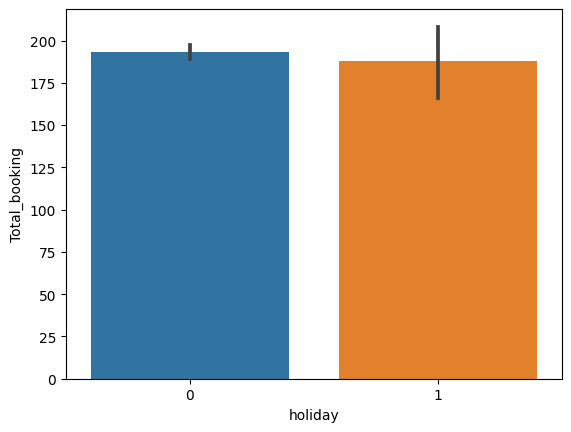

In [31]:
sns.barplot(x='holiday',y='Total_booking',data=df)

In [ ]:
Cab bookings are same wheather it is a working day or not

<Axes: xlabel='workingday', ylabel='Total_booking'>

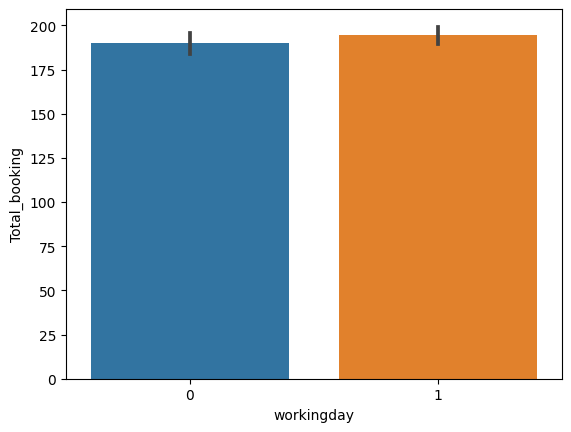

In [32]:
sns.barplot(x='workingday',y='Total_booking',data=df)

In [ ]:
On 'Clear + Few clouds' cab bookings are more compared to other weather
On 'Light Snow, Light Rain' cab bookings are less compared to other weather

<Axes: xlabel='weather', ylabel='Total_booking'>

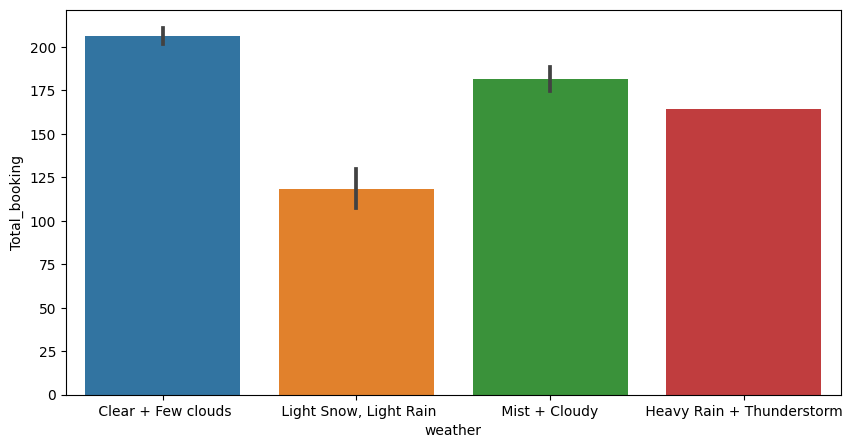

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='weather',y='Total_booking',data=df)

In [ ]:
Temp/atemp vs total_booking plot looks more or less like a linear plot.
That means as temperature increase,the no. of bookings increasing

<Axes: xlabel='temp', ylabel='Total_booking'>

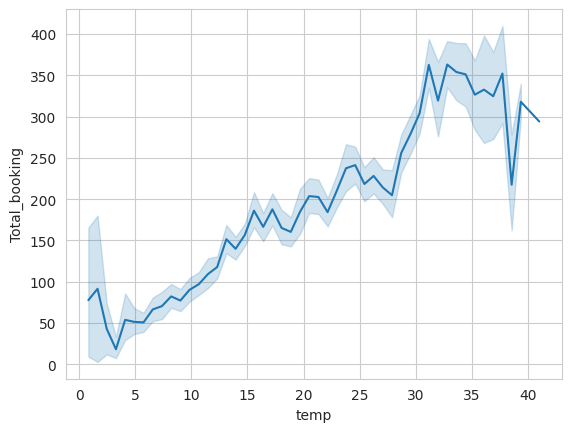

In [34]:
sns.set_style('whitegrid')
sns.lineplot(x='temp',y='Total_booking',data=df)

<Axes: xlabel='atemp', ylabel='Total_booking'>

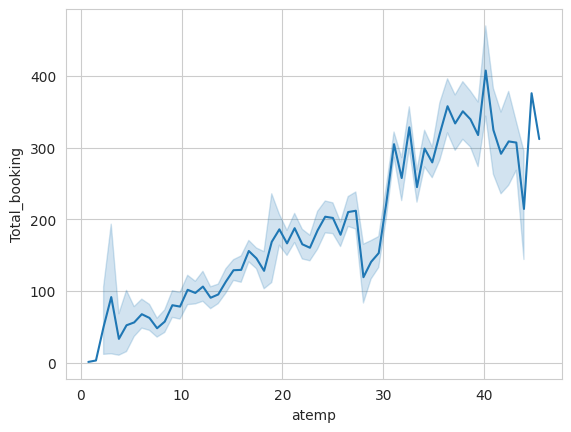

In [35]:
sns.set_style('whitegrid')
sns.lineplot(x='atemp',y='Total_booking',data=df)

In [ ]:
Plot with -ive slope --> that means as humidity increases,the total bookings are reducing

<Axes: xlabel='humidity', ylabel='Total_booking'>

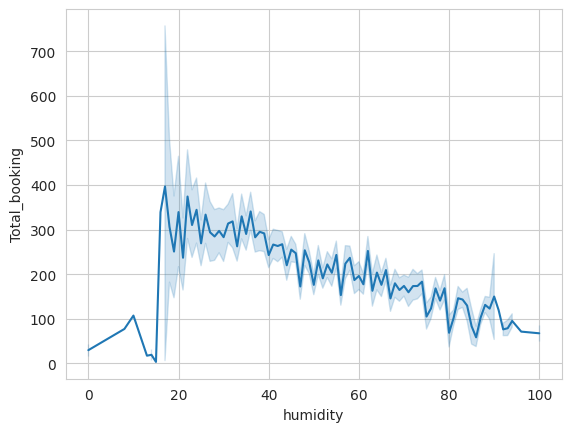

In [36]:
sns.set_style('whitegrid')
sns.lineplot(x='humidity',y='Total_booking',data=df)

In [ ]:
In the month of january & february booking are less compared to other months

<Axes: xlabel='month', ylabel='Total_booking'>

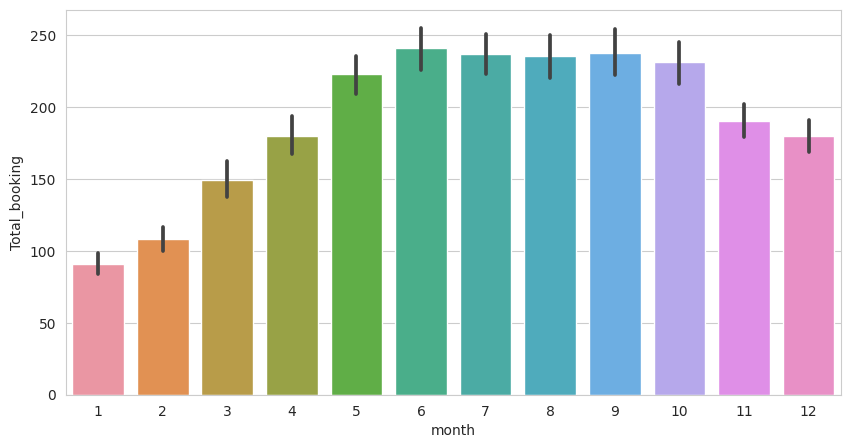

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='Total_booking',data=df)

In [ ]:
Evening times booking are more

<Axes: xlabel='hour', ylabel='Total_booking'>

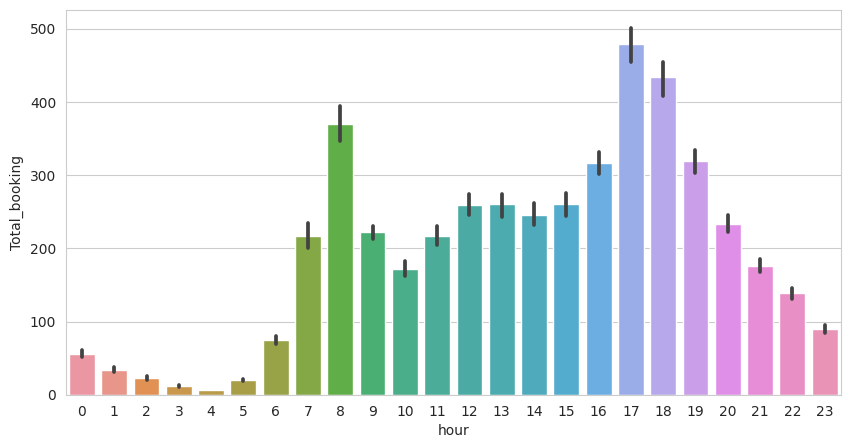

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='hour',y='Total_booking',data=df)

In [ ]:
#   cab bookings are more or less equal irrespective of a day

<Axes: xlabel='weekday', ylabel='Total_booking'>

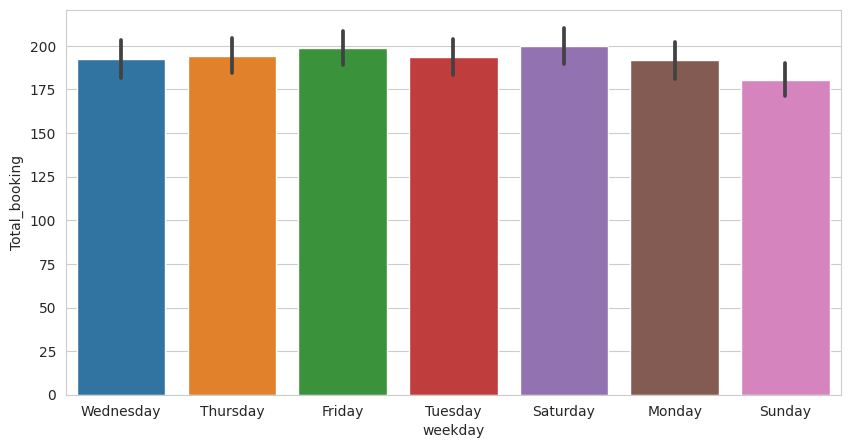

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='Total_booking',data=df)

# Feature engineering

In [40]:
# applying Labelencoder,get_dummies,Scaling

lb_encoder=LabelEncoder()
df['season']=lb_encoder.fit_transform(df['season'])
df['weekday']=lb_encoder.fit_transform(df['weekday'])

In [41]:
lb_encoder=LabelEncoder()
df_test['season']=lb_encoder.fit_transform(df_test['season'])
df_test['weekday']=lb_encoder.fit_transform(df_test['weekday'])

In [42]:
df=pd.get_dummies(df,columns=['weather'])

In [43]:
df_test=pd.get_dummies(df_test,columns=['weather'])

In [44]:
print(df.shape)
df.head()

(8526, 15)


,season,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,month,hour,weekday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,22.14,25.760,77,16.9979,504,5,19,6,1,0,0,0
1,0,0,1,28.70,33.335,79,19.0012,5,9,4,6,1,0,0,0
2,1,0,1,5.74,6.060,50,22.0028,139,1,9,4,1,0,0,0
3,3,0,1,13.94,16.665,29,8.9981,209,11,16,0,1,0,0,0
4,0,0,1,30.34,33.335,51,19.0012,184,9,13,5,1,0,0,0


In [45]:
df.columns


Index(['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Total_booking', 'month', 'hour', 'weekday',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [47]:
#Dropping Unncessary Variables

df.drop(columns=['temp','holiday','workingday','weekday'],axis=1,inplace=True)

df_test.drop(columns=['temp','holiday','workingday','weekday'],axis=1,inplace=True)

In [48]:
df.head()

,season,atemp,humidity,windspeed,Total_booking,month,hour,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,25.760,77,16.9979,504,5,19,1,0,0,0
1,0,33.335,79,19.0012,5,9,4,1,0,0,0
2,1,6.060,50,22.0028,139,1,9,1,0,0,0
3,3,16.665,29,8.9981,209,11,16,1,0,0,0
4,0,33.335,51,19.0012,184,9,13,1,0,0,0


In [49]:
# scaling of 'atemp','humidity','windspeed' --> to normalize their weights

scaling=StandardScaler()
df[['atemp','humidity','windspeed']]=scaling.fit_transform(df[['atemp','humidity','windspeed']])

In [50]:
df_test[['atemp','humidity','windspeed']]=scaling.fit_transform(df_test[['atemp','humidity','windspeed']])

In [51]:
# splitting data to train & test

X=df.drop(columns=['Total_booking'])
y=df['Total_booking']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

# Model Building

# Different models regression analysis

Fit various models (Random Forest Regressor, Ada Boost Regressor, BaggingRegressor, SVR, and K-Neighbors Regressor)

In [52]:
models = [
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Bagging', BaggingRegressor()),
    ('SVR', SVR()),
    ('K-Neighbors', KNeighborsRegressor())
]


In [53]:
#Train and evaluate each model, calculating the RMSE:

results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, rmse))


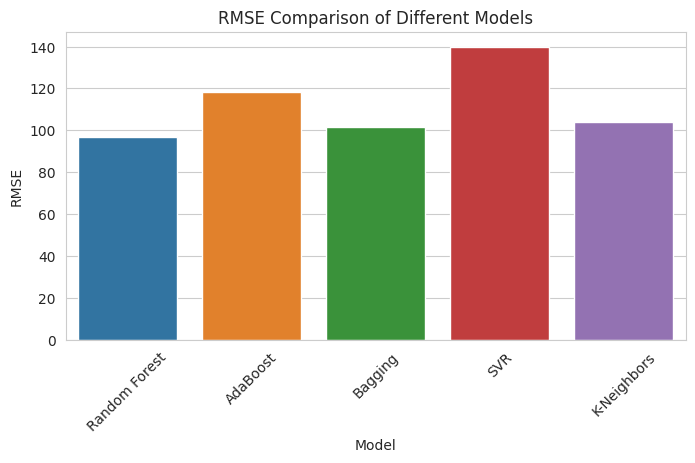

In [54]:
# creating a DataFrame from the results:
df_results = pd.DataFrame(results, columns=['Model', 'RMSE'])


# Plot the RMSE values using a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='RMSE', data=df_results)
plt.title('RMSE Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_results

,Model,RMSE
0,Random Forest,65.401558
1,AdaBoost,116.191229
2,Bagging,67.737698
3,SVR,140.841521
4,K-Neighbors,76.199934


Inference :

Random forest model performs well compared to the remaining models

# Grid search

GridsearchCV --> for finding the best parameters through hyper-parameter tuning

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid

param_grid = { 
     'n_estimators': [100, 200, 300],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [4,5,6,7,8],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
rf=RandomForestRegressor(max_depth = 8, max_features = 'auto', min_samples_leaf= 2, min_samples_split = 2, n_estimators = 200)
rf.fit(x_train,y_train)
print(f'RandomForest-RMSE value:{round(mean_squared_error(y_test,rf.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,rf.predict(x_test)),3)}')

RandomForest-RMSE value:97.24,R2 score:0.698


Inference :

Random forest model performs well after applying grid search CV also

# model selection

We have checked the model performance by dropping the 'working day, holiday,weekday' features & without dropping the
'working day, holiday,weekday' features. 

Based on this, without dropping the 'working day, holiday,weekday' features is giving best R2-Score compared to dropping
of 'working day, holiday,weekday' features.

So for 'test.csv' prediction here i am using without dropping the 'working day, holiday,weekday' features model.

we are going to use 'bagging with random forest as base estimator' for predicting the 'Total_booking' in 'test.csv'.

# Testing the trained model on 'test.csv'

In [79]:
df_test.head()

,season,atemp,humidity,windspeed,month,hour,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weather_ Heavy Rain + Thunderstorm
0,2,0.160949,-0.764829,2.777205,5,11,1,0,0,0
1,2,0.432824,0.060053,-0.697425,6,7,1,0,0,0
2,1,-1.378285,1.916038,1.908340,3,20,0,1,0,0
3,3,0.613875,1.039601,-1.566290,10,11,0,0,1,0
4,2,0.885153,-1.022605,1.411964,6,12,1,0,0,0


In [76]:
# predicting the values on 'test dataset'

from sklearn.metrics import mean_squared_log_error

# Perform prediction on the test set
y_pred = grid_search.predict(x_test)

# Calculate the mean squared log error
msle = mean_squared_log_error(y_test, y_pred)

# Print the mean squared log error
print("Mean Squared Log Error:", msle)


Mean Squared Log Error: 0.4786988632793483


In [77]:
df_prediction=pd.DataFrame(np.round(y_pred),columns=['prediction'])
df_prediction

,prediction
0,295.0
1,3.0
2,295.0
3,395.0
4,416.0
...,...
1701,110.0
1702,355.0
1703,109.0
1704,248.0


In [ ]:
# sending the values to 'output.csv'

In [78]:
df_prediction.to_csv('output.csv',index=False)

Conclusion:

In this problem, Cab company wants to predict how many cabs to be required at each time period. So, that they can be prepared for customer demand & surge. Due to this their reputation, customer satisfaction and revenue will improve. For predicting the total bookings on 'test.csv', they are having the existing data in the form of ‘train.csv’.

For finding the solution, I have approached following steps for predicting the ‘total bookings’ on ‘test.csv 

1)	Performed EDA analysis on train data for knowing the better insights about the data.

2)	Data cleaning, outlier analysis and feature engineering performed on train dataset. So, that data can be readily available for model building.

3)	Trained the model using – Regression analysis, Hyper-parameter tuning & finding of best parameters using Grid Search CV, and Ensemble learning.

4)	Based on the above analysis, ‘RandomForest Regressor’ is giving best results.

5)	So, same has been used for predicting the ‘total booking’ on ‘test.csv’ & predicted values are stored in ‘output.csv’.
